<a href="https://colab.research.google.com/github/Santiago-Valencia/LEARNING_ML/blob/master/1_NEURAL_NETWORK_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
# plt.figure()
# plt.imshow(train_images[100], cmap=plt.cm.binary)
# plt.grid(False)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

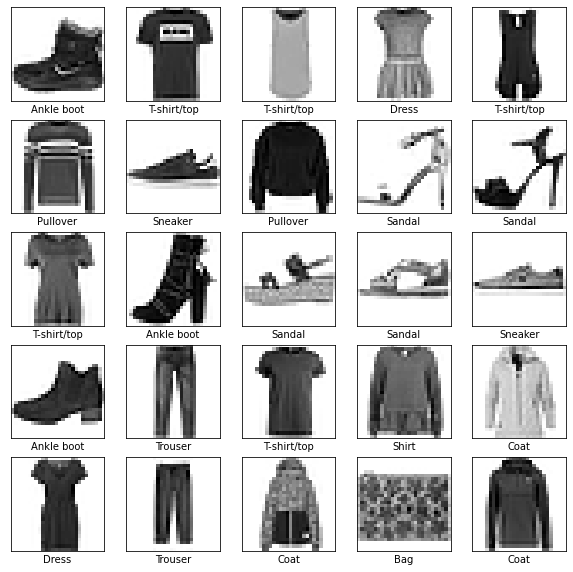

In [7]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape = (28, 28)),
     keras.layers.Dense(10, activation = tf.nn.relu),
     keras.layers.Dense(20, activation = tf.nn.relu),
     keras.layers.Dense(25, activation = tf.nn.relu),
     keras.layers.Dense(10, activation = tf.nn.softmax)
     ]
)

In [9]:
  print(
      model.summary()
  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
Total params: 8,855
Trainable params: 8,855
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(
    optimizer = tf.compat.v1.train.AdamOptimizer(), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [11]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs = 5, 
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6377 - accuracy: 0.7749 - val_loss: 0.5058 - val_accuracy: 0.8226
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4523 - accuracy: 0.8416 - val_loss: 0.4770 - val_accuracy: 0.8340
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4199 - accuracy: 0.8524 - val_loss: 0.4525 - val_accuracy: 0.8432
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3990 - accuracy: 0.8579 - val_loss: 0.4410 - val_accuracy: 0.8480
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3850 - accuracy: 0.8631 - val_loss: 0.4196 - val_accuracy: 0.8522


In [12]:
predictions = model.predict(test_images)

print(np.argmax(predictions[9999]))
print(predictions[9999])
# print(len(predictions))

5
[3.2920663e-03 6.3097331e-04 1.2304644e-03 6.4456137e-04 3.6914460e-03
 9.4346768e-01 2.4206289e-03 3.4313321e-02 8.8781677e-03 1.4307532e-03]


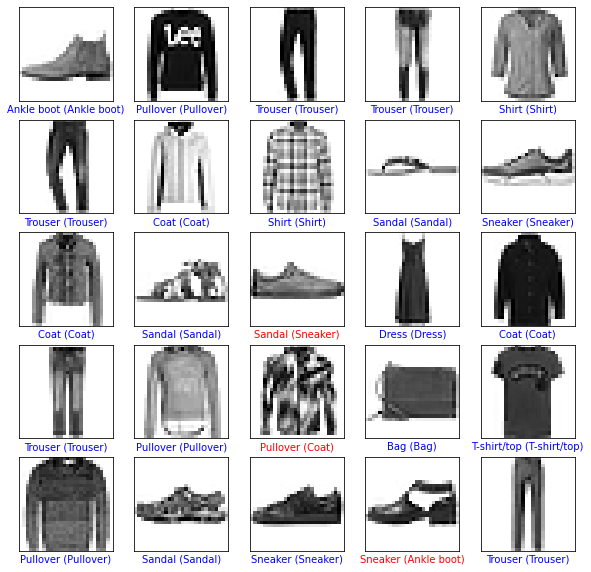

In [13]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

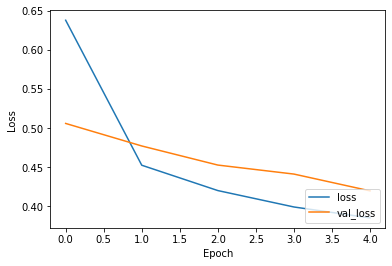

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

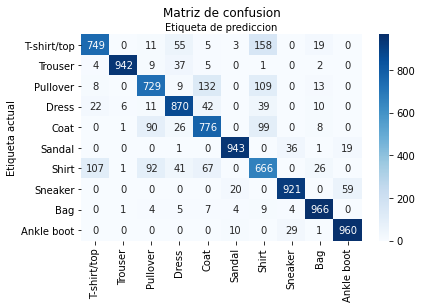

In [16]:
from sklearn import metrics
import seaborn as sns
import pandas as pd



y_pred = np.argmax(model.predict(test_images), axis=-1)
# y_pred =  model.predict_classes(test_images)
y_ref = test_labels

cnf_matrix = metrics.confusion_matrix(y_ref, y_pred)


fig, ax = plt.subplots()
# trick_marks = np.arange(len(class_names))
# plt.xticks(trick_marks, class_names)
# plt.yticks(trick_marks, class_names)

df_cm = pd.DataFrame(cnf_matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])

sns.heatmap(df_cm, annot=True, cmap='Blues' , fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

plt.show()